In [14]:
from object_detection_model import ObjectDetectionModel
from inpainting.inpaint import Inpainting
from util import resize
from util import load_image_into_numpy_array

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
object_detection_m = ObjectDetectionModel()

InvalidArgumentError: assertion failed: [0] [Op:Assert] name: EagerVariableNameReuse

In [2]:
inpainting = Inpainting()

creating sift keypoint dataset
loading face drawings
load complete


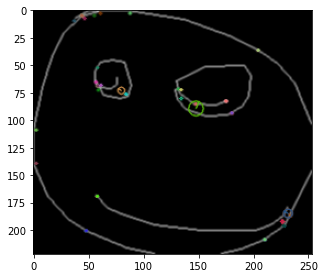

In [145]:
import sys, importlib
from quick_draw_dataset import QuickDrawDataset
importlib.reload(sys.modules['quick_draw_dataset'])
from quick_draw_dataset import QuickDrawDataset 
qd_dataset = QuickDrawDataset()
import cv2

In [38]:
# Runs image evaluation on image in source_path and saves results to sink_path
def evaluate(object_detection, qd_dataset, inpainting, source_path, sink_path):
    for filename in os.listdir(source_path):
        if filename.endswith(".JPG") or filename.endswith(".PNG") or filename.endswith(".jpeg") or filename.endswith(".jpg"):
            print('Evaluating : ', filename)
            image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
            image_resized = resize(image_np, 256)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(image_np[0])
#             plt.show()
            
            detections = object_detection.inference(image_resized, logging=True)
#             print(detections['detection_keypoints'])
            pruned_detections, mask_detections, body_detections = qd_dataset.prune_detections(image_resized.shape, detections, threshold=0.3)
            
            _ = inpainting.create_mask(body_detections, logging=True)
            mask = inpainting.create_mask(mask_detections, logging=True)
            image_inpainted = inpainting.inpaint(image_resized, mask, logging=True)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(image_inpainted)
#             plt.show()
            
            drawn_image = qd_dataset.draw(image_inpainted,image_resized, pruned_detections, os.path.join(sink_path, filename), logging=True)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(drawn_image)
#             plt.show()
            
evaluate(object_detection, qd_dataset, inpainting, 'test_images', 'test_images_drawn')

NameError: name 'object_detection' is not defined

Single Image Detection

In [40]:
source_path = 'test_images'
sink_path = 'test_images_drawn'
filename = 'IMG_0969.jpeg'
image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
image_resized = resize(image_np, 256)

#             plt.figure(figsize=(5,5))
#             plt.imshow(image_np[0])
#             plt.show()

detections = object_detection.inference(image_resized, logging=True)
#             print(detections['detection_keypoints'])
pruned_detections, mask_detections, body_detections = qd_dataset.prune_detections(image_resized.shape, detections, threshold=0.3)

_ = inpainting.create_mask(body_detections, logging=True)
mask = inpainting.create_mask(mask_detections, logging=True)
image_inpainted = inpainting.inpaint(image_resized, mask, logging=True)

#             plt.figure(figsize=(5,5))
#             plt.imshow(image_inpainted)
#             plt.show()

drawn_image = qd_dataset.draw(image_inpainted,image_resized, pruned_detections, os.path.join(sink_path, filename), logging=True)
            

NameError: name 'object_detection' is not defined

Canny Edge Testing

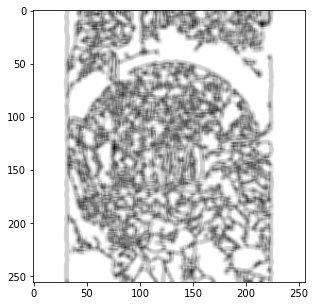

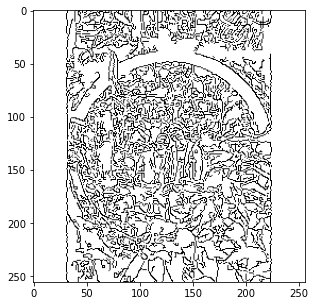

In [13]:
source_path = 'test_images'
sink_path = 'test_images_drawn'
filename = 'IMG_0969.jpeg'
# filename = 'IMG_1206.JPG'
image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
image_resized = resize(image_np, 256)

image_edges = cv2.Canny(image_resized, 50, 400, apertureSize = 3, L2gradient = True)
image_edges = cv2.GaussianBlur(image_edges, (5,5),cv2.BORDER_DEFAULT)

plt.figure(figsize=(5,5))
plt.imshow(image_edges, cmap='Greys')
plt.show()

image_edges = cv2.Canny(image_resized, 50, 400, apertureSize = 3, L2gradient = False)

plt.figure(figsize=(5,5))
plt.imshow(image_edges, cmap='Greys')
plt.show()

Resized Image Testing

In [ ]:
from quickdraw import QuickDrawData
import cv2

qd = QuickDrawData()

anvil = qd.get_drawing("anvil")
anvil = anvil.image
plt.imshow(anvil)
plt.axis('off')
plt.show() 
print(np.array(anvil).shape)

anvil = cv2.resize(np.array(anvil), (38, 30))
plt.imshow(anvil)
plt.axis('off')
plt.show() 

sifted keypoints found
translating to keypoints
success
(256, 256, 3)


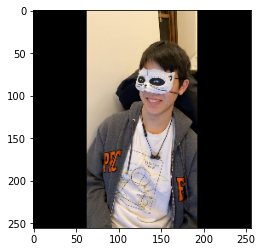

{'bbox': (110, 40, 90, 100), 'class': 'face'}
(100, 90)


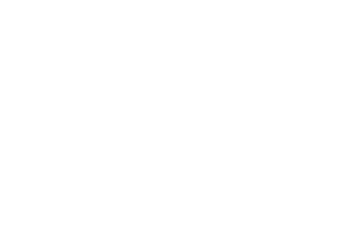

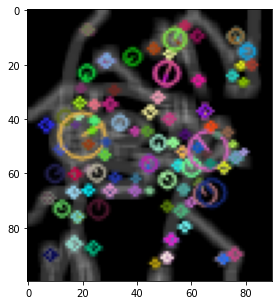

loading face drawings
load complete
QuickDrawing key_id=5206623440076800


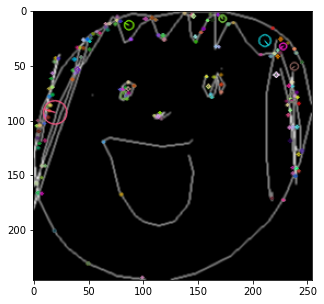

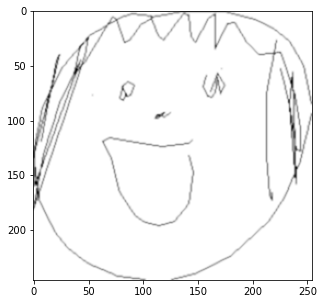

[[ 1.51130468e-01 -7.66111838e-01  4.52154385e+01]
 [-9.78214674e-02 -1.22533793e+00  1.02731558e+02]
 [ 7.03688790e-04 -1.21518130e-02  1.00000000e+00]] 5206623440076800 11
[[  1.           0.         -45.21543847]
 [  0.           1.         -67.18274195]
 [  0.           0.           1.        ]] (26, 54)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


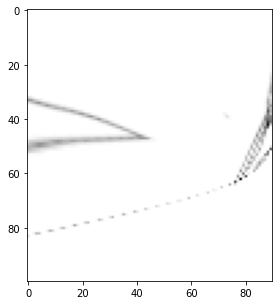

{'bbox': (70, 100, 110, 250), 'class': 't-shirt'}
(156, 110)


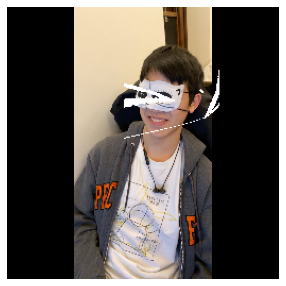

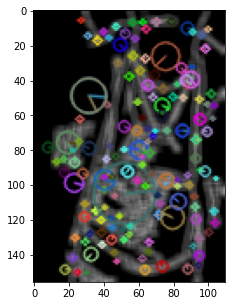

loading t-shirt drawings
load complete
QuickDrawing key_id=6361655401250816


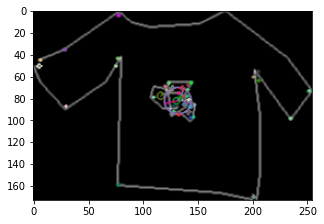

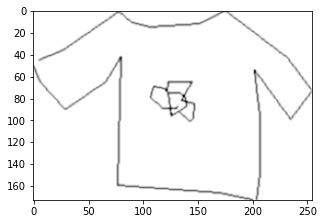

[[-2.45984630e-01 -1.76579969e-01  4.20665535e+01]
 [-6.27259309e-02 -8.53276428e-02  1.36092965e+01]
 [-4.88157282e-03 -5.62199769e-03  1.00000000e+00]] 6361655401250816 8
[[  1.           0.           1.51402195]
 [  0.           1.         -13.60929654]
 [  0.           0.           1.        ]] (43, 5)
[[ 0  0  0 ... 38 40 40]
 [ 0  0  0 ... 40 42 42]
 [ 0  0  0 ... 42 42 44]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


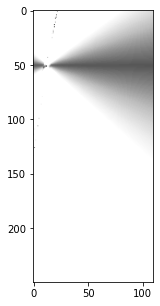

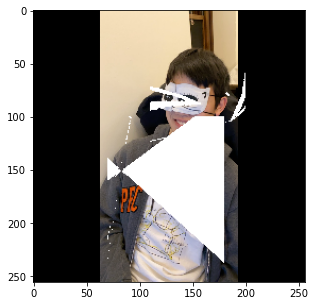

In [153]:
from quick_draw_dataset import QuickDrawDataset
importlib.reload(sys.modules['quick_draw_dataset'])
from quick_draw_dataset import QuickDrawDataset 
qd_dataset = QuickDrawDataset()

##test homography
# source_path = 'val2017'
# filename = '000000001584.jpg'
source_path = 'test_images'
# filename = 'IMG_2838.jpeg'
filename='IMG_1206.JPG'
sink_path = 'test_images_drawn'


# filename = 'IMG_1206.JPG'
image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
image_resized = resize(image_np, 256)

print(image_resized.shape)
plt.imshow(image_resized)
plt.show()

#todo don't resize image 

detections = [dict(), dict()]
# detections[0]['bbox'] = (150, 350, 200, 150)
# detecitons[0]['class'] = 'bus'

# detections[0]['bbox'] = (75, 130, 65, 40)# dog (fox)
# detections[0]['class'] = 'dog'

# detections[0]['bbox'] = (50, 40, 170, 180)
detections[0]['bbox'] = (110, 40, 90, 100)
detections[0]['class'] = 'face'

detections[1]['bbox'] = (70, 100, 110, 250)
detections[1]['class'] = 't-shirt'

qd_dataset.draw_sift(image_resized, image_resized, detections, 'test.jpg', logging=False)